# Text Analysis Using `nltk.text`

In [1]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [2]:
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park. That girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee."
tokens = word_tokenize(my_string)
tokens = [word.lower() for word in tokens]
tokens[:5]

['two', 'plus', 'two', 'is', 'four']

In [3]:
t = Text(tokens)
t

<Text: two plus two is four , minus one...>

This method of converting raw strings to NLTK `Text` instances can be used when reading text from a file. For instance:
```python
f = open('my-file.txt','rU') # Opening a file with the mode 'U' or 'rU' will open a file for reading in universal newline mode. All three line ending conventions will be translated to a "\n"
raw = f.read()
```

In [4]:
t.concordance('uckers') # concordance() is a method of the Text class of NLTK. It finds words and displays a context window. Word matching is not case-sensitive.
# concordance() is defined as follows: concordance(self, word, width=79, lines=25). Note default values for optional params.

Displaying 1 of 1 matches:
 girl in the park . that girl is an uckers . when the thing went quack quack q


In [5]:
t.collocations() # def collocations(self, num=20, window_size=2). num is the max no. of collocations to print.

hold tight; quack quack


In [6]:
t.count('quack')

3

In [7]:
t.index('two')

0

In [8]:
t.similar('brother') # similar(self, word, num=20). Distributional similarity: find other words which appear in the same contexts as the specified word; list most similar words first.

guy


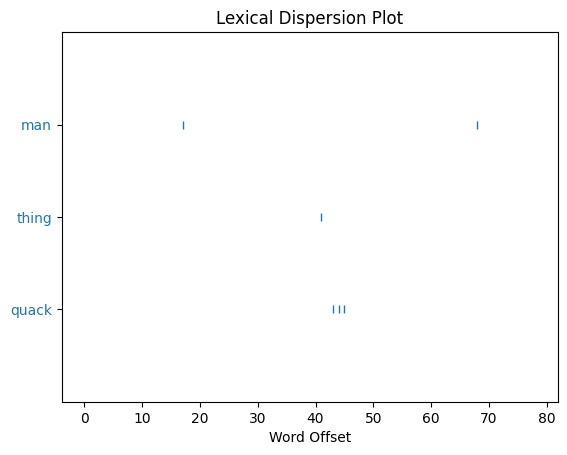

In [9]:
t.dispersion_plot(['man', 'thing', 'quack']) # Reveals patterns in word positions. Each stripe represents an instance of a word, and each row represents the entire text.

<Axes: xlabel='Samples', ylabel='Counts'>

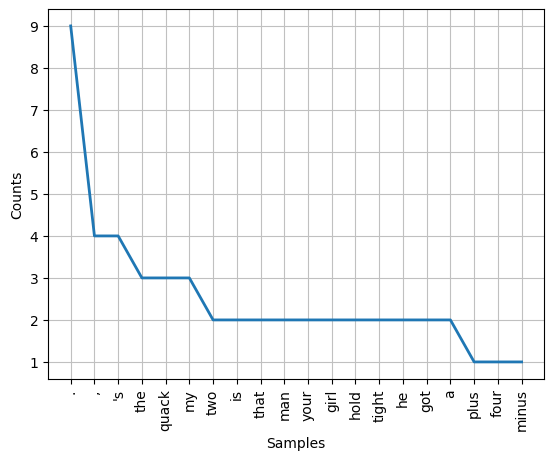

In [10]:
t.plot(20) # plots 20 most common tokens

In [11]:
t.vocab()

FreqDist({'.': 9, ',': 4, "'s": 4, 'the': 3, 'quack': 3, 'my': 3, 'two': 2, 'is': 2, 'that': 2, 'man': 2, ...})

Another thing that might be useful in analysis is finding common contexts. Our text is too small so we will use a bigger one.

NLTK comes with several interesting **corpora**, which are large collections of text. You can check out what kinds of corpora are found in `nltk.corpus` in Section 1 [here](http://www.nltk.org/book/ch02.html).

`reuters` is a corpus of news documents. More specifically, `reuters` is a *corpus reader* for the Reuters corpus which provides us with methods to access the corpus:

In [12]:
from nltk.corpus import reuters
text = Text(reuters.words()) # .words() is one method corpus readers provide for reading data from a corpus. We will learn more about these methods in Chapter 2.
text.common_contexts(['August', 'June']) # It seems that .common_contexts() takes 2 words which are used similarly and displays where they are used similarly. It also seems that '_' indicates where the words would be in the text.

in_1986 in_, in_. in_1985 begins_1 last_. in_and last_, since_1985
and_and in_1987 since_1984 of_. for_shipment and_, ,_, -_) last_to
in_last by_.


We will further explore the Reuters corpus as well as several others in later chapters.